<img align="left" style="width: 170px;" src="udea_escudo.png">

# Laboratorio 4 PDS 2020-1
### Yorguin José Mantilla Ramos
CC.1127617499
 
Grupo:3


### 2. Analisis de series de tiempo
#### 2.1 Procedimiento

##### 2.1.1 La senal corresponde a datos de un pluviometro que mide la cantidad diaria de lluvia en una region del sur
del amazonas desde 1978 hasta 2011. El archivo data precipitacion.txt contiene 3 columnas con la siguiente
información:
- Dia, desde 1 hasta 365, de acuerdo al d´ıa de cada a˜ no.
- Año, desde 1978 hasta 2011.
- Valor de la precipitación (en mm de precipitación).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_utils as mu

data = np.loadtxt('data_precipitacion.txt', delimiter=',')
print(data.shape)

(12410, 3)


##### 2.1.2 ¿Cuál es el periodo de muestreo para estas señales?. Expreselo en dias y años.

$T_s= 1 dia = \frac{1}{365} año \approx 0.00274 año$

##### 2.1.3 Extraiga cada una de las columnas descritas anteriormente a un vector.

In [2]:
days = data[:,0]
years = data[:,1]
rain = data[:,2]
all_time = np.arange(days.shape[0])+1
print(days)
print(years)
print(rain)
print(all_time)

[  1.   2.   3. ... 363. 364. 365.]
[1978. 1978. 1978. ... 2011. 2011. 2011.]
[19.59 17.46 15.32 ... 11.71  2.97 10.39]
[    1     2     3 ... 12408 12409 12410]


##### 2.1.4 Grafique la señal en función del tiempo y presente un análisis sobre la misma

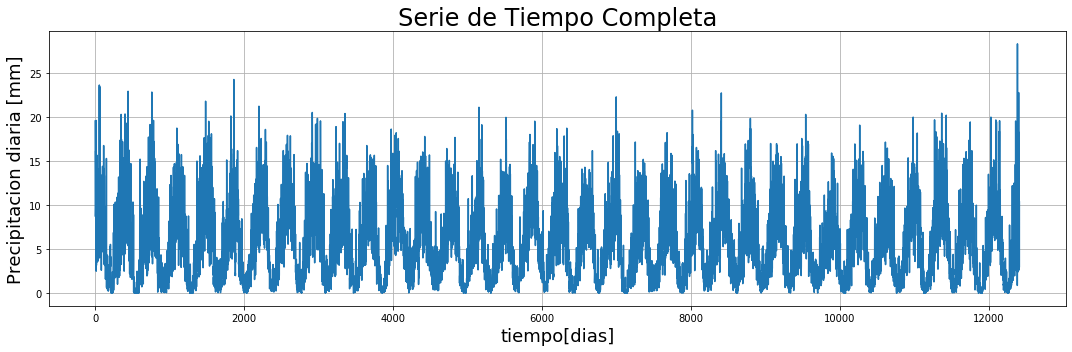

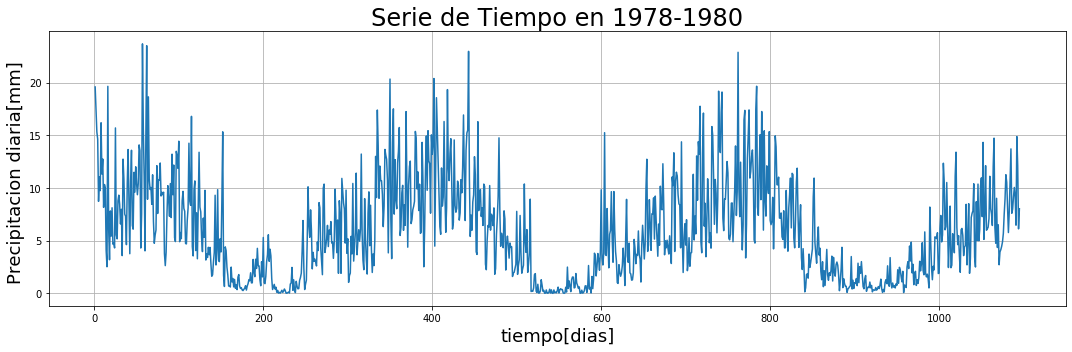

In [3]:
mu.plot_signal(all_time,rain,xlabel='tiempo[dias]',ylabel='Precipitacion diaria [mm]',
               title='Serie de Tiempo Completa',show=True)
mu.plot_signal(all_time[:3*365],rain[:3*365],xlabel='tiempo[dias]',ylabel='Precipitacion diaria[mm] ',
               title='Serie de Tiempo en 1978-1980',show=True)

Analisis
- Se muestra cierta periodicidad en la señal
- Sin embargo la señal tiene algunos cambios que son abruptos por lo que no es suave
- Vemos que de 1978 hasta el final de 1980 hay alrededor de 3 periodos de la señal
- La periodicidad de la señal debe ser cerca de 1 año aproximadamente


##### 2.1.5 Realice un histograma de la señal previa, y analice el resultado de la gráfica.

nbins 49


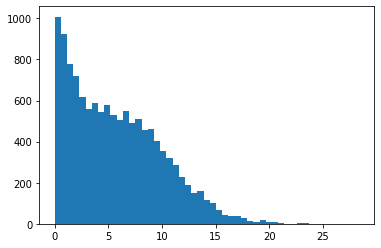

In [4]:
import scipy.stats as st
def get_nbins(x): # Freedman–Diaconis rule
    bin_width =2*st.iqr(x)/(x.shape[0]**(1/3))
    nbins = int((np.max(x) - np.min(x))/bin_width)
    return nbins
nbins = get_nbins(rain)
print('nbins',nbins)
plt.hist(rain,bins=nbins)
plt.show()

Analisis
- La distribucion de precipitaciones diarias no es gaussiana
- Podemos ver que las precipitaciones baja son más comunes
- En general la distribucion sigue un comportamiento 1/precipitacion (las mayores precipitaciones son menos comunes)

Nota:
Utilicé la regla de Freedman–Diaconis para estimar la cantidad de bin adecuada

##### 2.1.6 Extraiga, grafique y analice brevemente el comportamiento de la lluvia en el amazonas en el año en que usted nació.


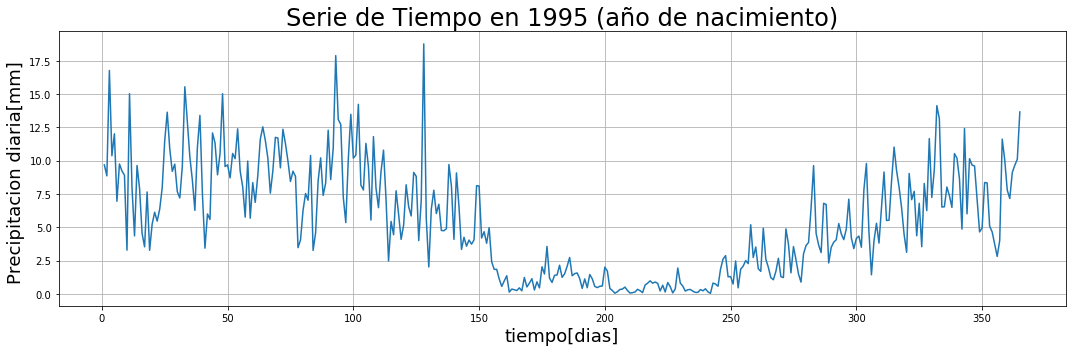

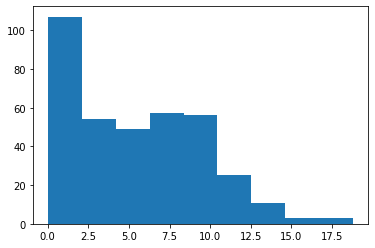

In [5]:
my_bd = 1995
idxs = np.where(years == my_bd)

mu.plot_signal(all_time[idxs]-np.min(idxs[0]),rain[idxs],xlabel='tiempo[dias]',ylabel='Precipitacion diaria[mm] ',
               title='Serie de Tiempo en 1995 (año de nacimiento)',show=True)
nbins= get_nbins(rain[idxs])
plt.hist(rain[idxs],bins=nbins)
plt.show()

Analisis
- Se ve un comportamiento similar donde la señal parece describir un lobulo ruidoso
- Los primeros dias del año hay precipitaciones mas fuertes, luego se atenua cerca de la mitad del año para luego volver a crecer en los ultimos meses del año
- La muestra de precipitaciones en 1995 sigue una distribucion similar a la derivada de la muestra completa de la señal
- Aunque entre los bins 2.5 y 10 hay valores de frecuencias muy cercanos

### 3. Filtro de media móvil

#### 3.1 Procedimiento

##### 3.1.1 Diseñe un filtro de media móvil con 4 diferentes valores de L en el rango de 50 a 500, calcule la respuesta de la señal ante dicho filtro y grafique la señal resultante usando subplots (se puede utilizar el vector de tiempos generado anteriormente). ¿Con cual considera que se visualiza y se podria analizar mejor la información?


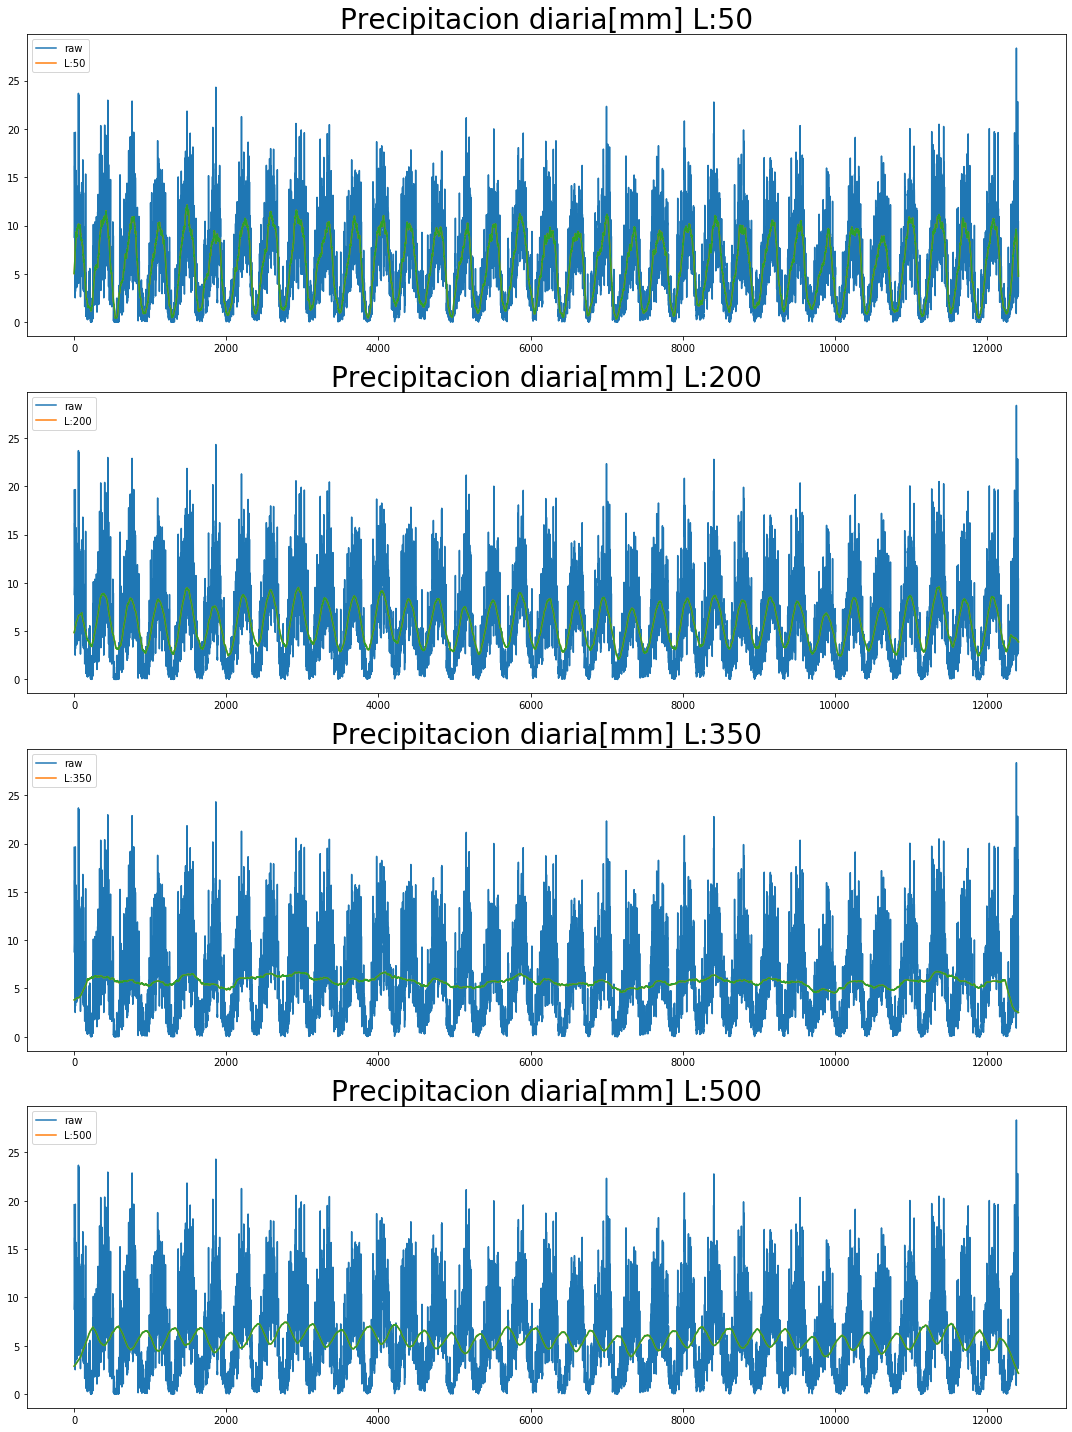

In [6]:
def get_moving_average_filter(L):
  coefs=np.ones(L)/float(L)
  num=np.zeros(L)
  num[0]=1.0/L
  num[-1]=-1.0/L
  den=np.zeros(L)
  den[0]=1
  den[1]=-1
  #print('coefs',coefs)
  #print('num',num)
  #print('den',den)
  return coefs,num,den

signal = rain #rain[idxs] # my año de nacimiento
time = all_time #all_time[idxs]-np.min(idxs[0]) # offset es para que vaya de 1 a 365

# Ls
top = signal.shape[0] if signal.shape[0] <= 500 else 500
Ls = np.linspace(50,top,4).astype(int)

fig1, axs = plt.subplots(4)
fig1.set_size_inches((15,5*Ls.shape[0]))

for i,L in enumerate(Ls):
  coefs,num,den = get_moving_average_filter(L)
  smooth_signal = np.convolve(signal, coefs, mode='same')   
  axs[i].set_title('Precipitacion diaria[mm]'+' L:'+str(L),{'fontsize':28})
  axs[i].plot(time,signal)
  axs[i].plot(time,smooth_signal)
  labels = ['raw']
  labels.append('L:'+str(L))
  axs[i].plot(time,smooth_signal)
  axs[i].legend(labels)
plt.tight_layout()
plt.show()

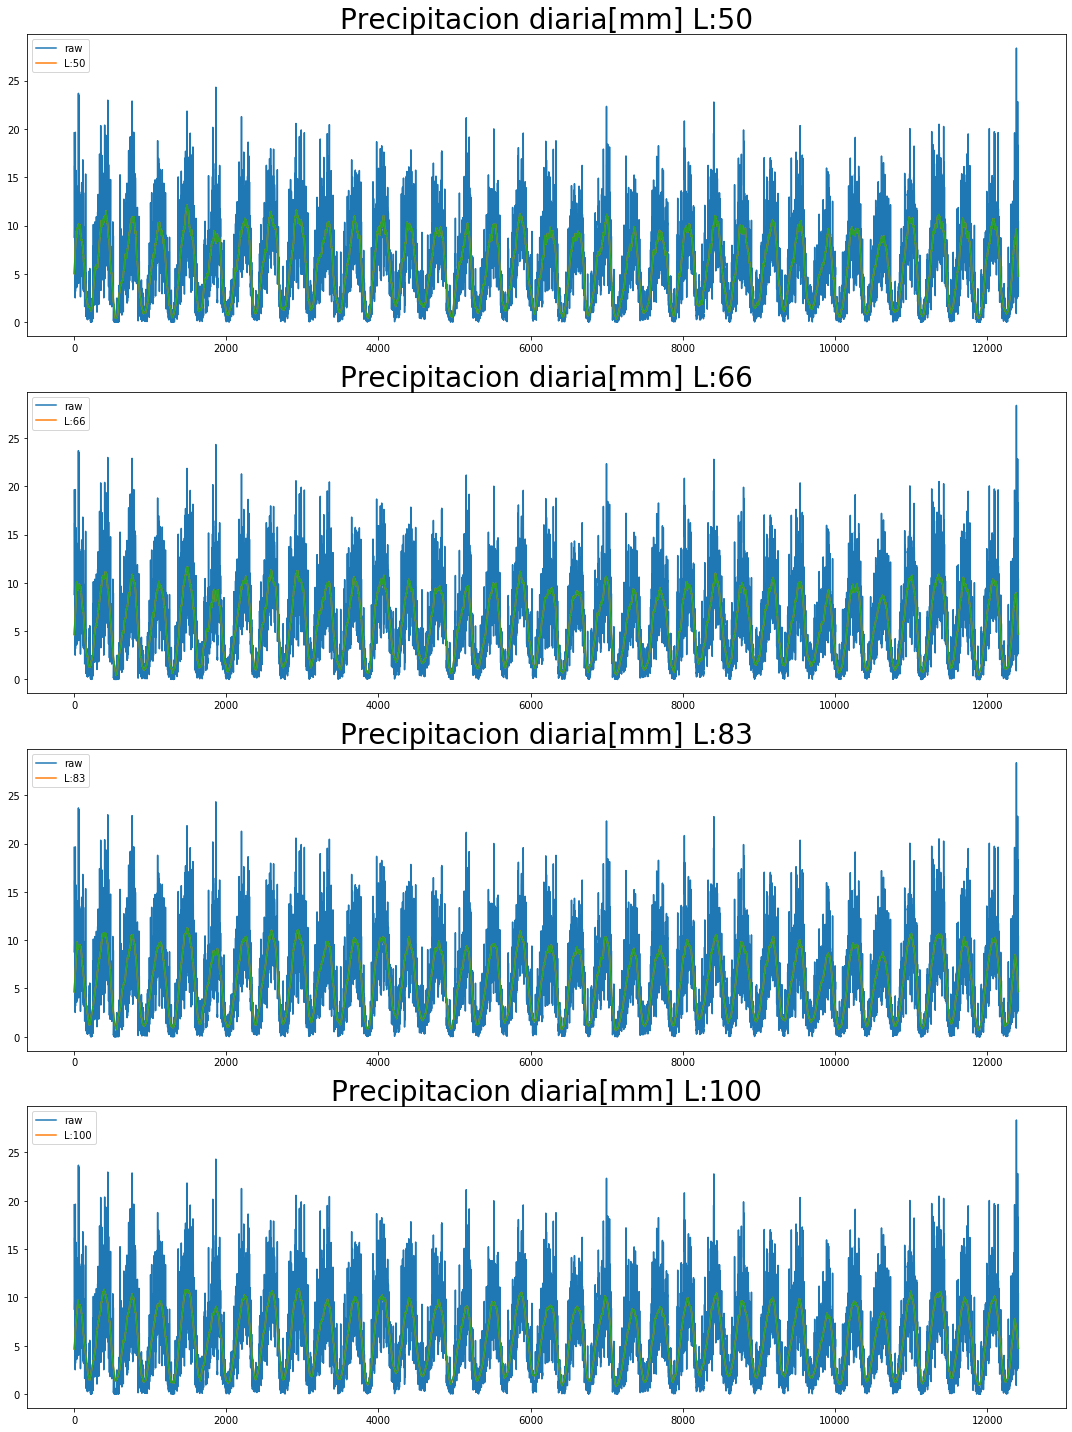

In [7]:
# Ls
top = 100
Ls = np.linspace(50,top,4).astype(int)

fig1, axs = plt.subplots(4)
fig1.set_size_inches((15,5*Ls.shape[0]))

for i,L in enumerate(Ls):
  coefs,num,den = get_moving_average_filter(L)
  smooth_signal = np.convolve(signal, coefs, mode='same')   
  axs[i].set_title('Precipitacion diaria[mm]'+' L:'+str(L),{'fontsize':28})
  axs[i].plot(time,signal)
  axs[i].plot(time,smooth_signal)
  labels = ['raw']
  labels.append('L:'+str(L))
  axs[i].plot(time,smooth_signal)
  axs[i].legend(labels)
plt.tight_layout()
plt.show()

Probé 4 valores de L en el rango 50,500 equiespaciados, pero se perdía mucha informacion de la señal, por ello probe luego otros 4 valores entre 50 y 100 equiespaciados

Analizaría la señal con L = 50 ya que es lo suficientemente suave y retiene la suficiente informacion de la amplitud

Conclusiones
- A medida que aumenta L más suave se ve la señal pero más información se pierde
- Seleccionamos L = 50 porque es un buen balance entre suavidad e información retenida
- Al suavizar la señal más pareciera introducirse un desfase (ver grafica $L = 500$)
- Se usa el modo same de convolve para que se retorne la señal suave con la misma cantidad de puntos que la original
- Cuando L aumenta tiende a acercarse al valor DC (Promedio de la señal completa), la igualdad se da con L = Longitud de la señal
- Al aumentar L la amplitud de la señal resultante tiende a disminuir, esto porque el denominador del promedio aumenta

##### 3.1.2 Importe las funciones del archivo ztrans.py incluido con esta gu´ıa (asegúrese de ubicarlo en la misma carpeta del Notebook), las cuales calculan la respuesta en frecuencia, respuesta al escalón, y al impulso

In [8]:
import ztrans as zt


##### 3.1.3 Utilice la función impz para graficar y analizar la respuesta al impulso y al escalón del filtro de media móvil. ¿Qué me indica la respuesta al impulso? Compare los resultados con L = 10 y L = 30.

############################## L : 10 ##############################


Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


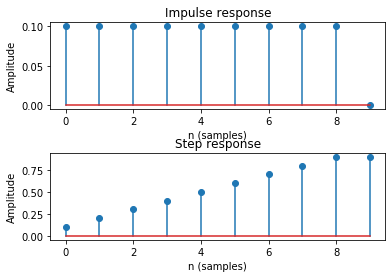

############################## L : 30 ##############################


Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


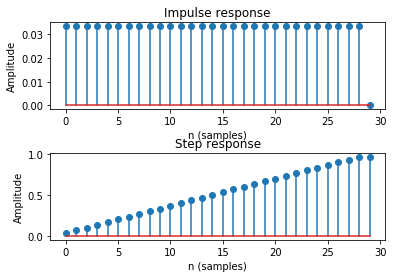

############################## L : 50 ##############################


Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


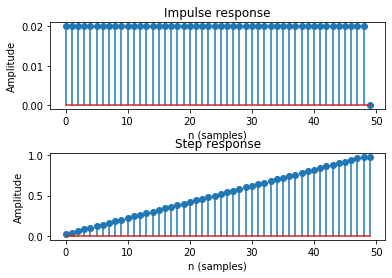

In [9]:
margin = 30
for L in [10,30,50]:
  print('#'*margin+' L : '+str(L)+' ' + '#'*margin)
  coefs,num,den = get_moving_average_filter(L)
  zt.impz(num,den)

La respuesta al impulso muestra como se comportaría el sistema ante un solo pulso en el tiempo; al conocerla podemos saber la respuesta ante cualquier otra señal ya que dicha señal se puede representar como la sumatoria de impulsos con distintos escalamientos.

Conclusiones

- La respuesta al impulso es un escalon hasta la muestra $L - 2$
- La respuesta al impulso es de soporte finito
- Mientras más grande L más se tarda la respuesta al escalón en estabilizarse (pero lo logra, el sistema es estable)

De la respuesta al impulso podemos a decir que
- El sistema es estable (respuesta al impulso de decrece conforme avanzan las muestras)
- El sistema es causal (respuesta al impulso comienza en 0)

##### 3.1.4 Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de media móvil. ¿Qué tipo de filtro es? ¿Cómo es su respuesta en fase? Compare los resultados con L = 10 y L = 30.

############################## L : 10 ##############################


C:\software\anaconda3\lib\site-packages\scipy\signal\filter_design.py:470: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


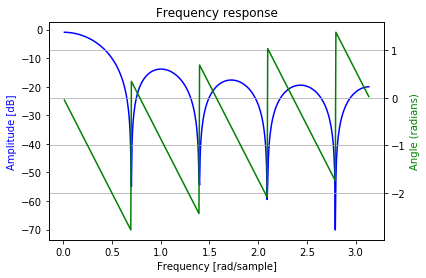

############################## L : 30 ##############################


C:\software\anaconda3\lib\site-packages\scipy\signal\filter_design.py:470: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


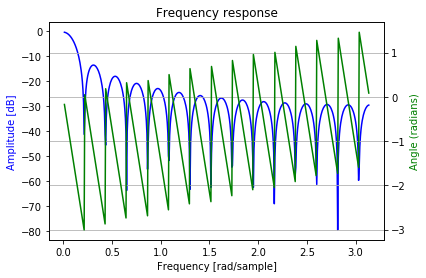

############################## L : 50 ##############################


C:\software\anaconda3\lib\site-packages\scipy\signal\filter_design.py:470: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


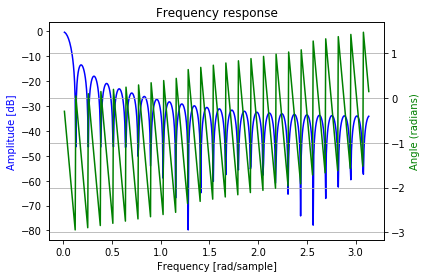

In [10]:
margin = 30
for L in [10,30,50]:
  print('#'*margin+' L : '+str(L)+' ' + '#'*margin)
  coefs,num,den = get_moving_average_filter(L)
  zt.mfreqz(num,den)

Conclusiones

- Al aumentar L mayor es el efecto pasabajas, lo cual se ve intuitivamente ya que al aproximar n = num total de muestras se tiene el valor DC que es el promedio de la señal
- Lo anterior tambien se vé en el hecho de que a medida que L aumenta la frecuencia de corte se acerca mas al DC.
- En cada lobulo  de la respuesta en frecuencia se tiene una respuesta en fase lineal (la relacion entre fase y frecuencia es una linea)
- El eje frecuencial se da en terminos de la frecuencia normalizada
- Cuando $f_{norm}=1$ se está en la frecuencia de Nyquist ( Ya que la normalizacion en frecuencia se realiza respecto a esta)
- Lo anterior implica que al aumentar L mucho el filtro pasabajas es muy fuerte, eliminando casi todo
- Los lobulos a la derecha del primero se encuentran cerca de -20dB por lo que esas frecuencias tambien se cortan


### 4. Filtro de primera diferencia


#### 4.1 Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro de primera diferencia, grafique y analice brevemente la señal resultante. ¿Qué me indica esta señal?

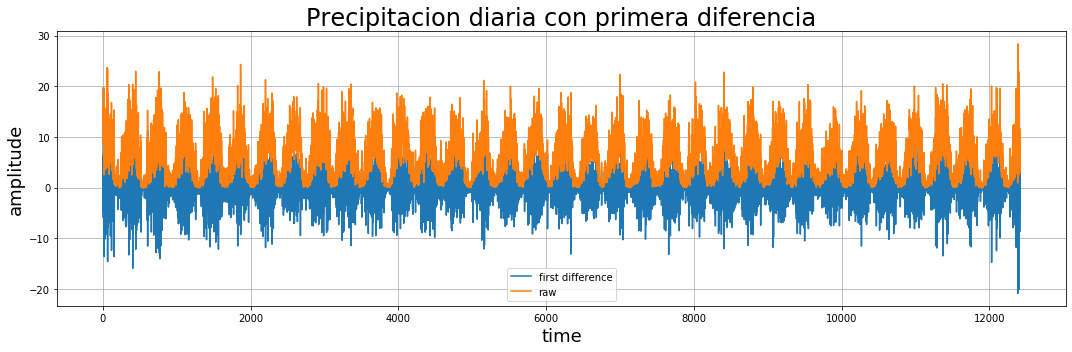

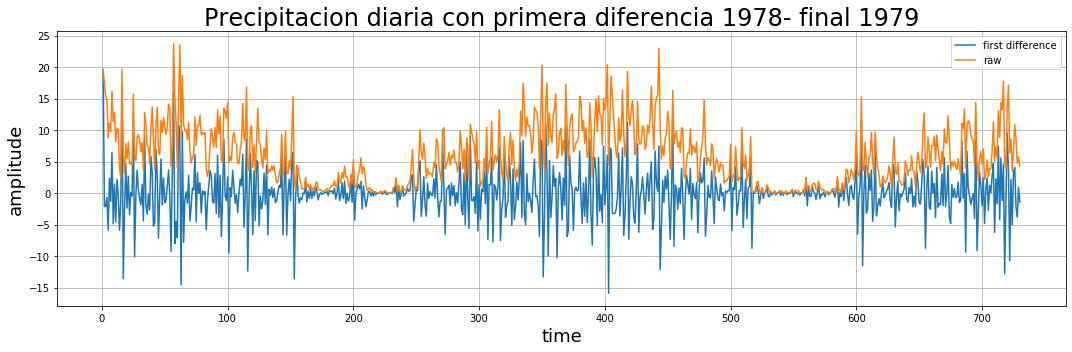

In [11]:
fdf = {'coefs':[1, -1],'num':[1, -1],'den':[1, 0]}

signal_derivative = np.convolve(signal, fdf['coefs'], mode='same') 

fig,ax = mu.plot_signal(time,signal_derivative,xlabel='time',ylabel='amplitude',
              title='Precipitacion diaria'+ ' con primera diferencia',ret=True,show=False)
ax.plot(time,signal)
ax.legend(['first difference','raw'])
plt.tight_layout()
plt.show()

fig,ax = mu.plot_signal(time[:365*2],signal_derivative[:365*2],xlabel='time',ylabel='amplitude',
              title='Precipitacion diaria'+ ' con primera diferencia 1978- final 1979',ret=True,show=False)
ax.plot(time[:365*2],signal[:365*2])
ax.legend(['first difference','raw'])
plt.tight_layout()
plt.show()

Conclusiones
- La señal resultante se ve un poco más ruidosa, esto es porque la derivada es grande en los cambios abruptos de la señal original
- En este sentido el filtro de primera diferencia amplifica el ruido
- Podría ser conveniente entonces aplicar el filtro de primera diferencia luego de un suavizado
- En general la señal aproxima la 1era derivada


#### 4.2 Utilice la función impz para graficar y analizar la respuesta al impulso y al escalón del filtro de primera diferencia. ¿Que me indica la respuesta al impulso?

Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, response)
Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem(x, step)


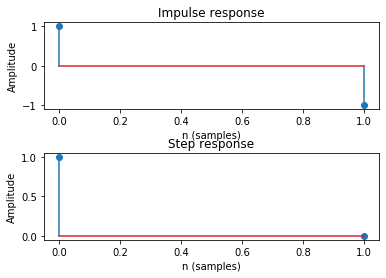

In [12]:
zt.impz(fdf['num'],fdf['den'])

Conclusiones
- Se puede ver que la respuesta al impulso es causal y finita
- Además es estable, esto se ve mas claramente en la respuesta al escalón donde en la 2da muestra ya la respuesta se anula

#### 4.3 Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia. ¿Que tipo de filtro es? ¿Cómo es la respuesta de fase?


Y:\code\pds_lab\Lab4_PDS_Mantilla_Yorguin\ztrans.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


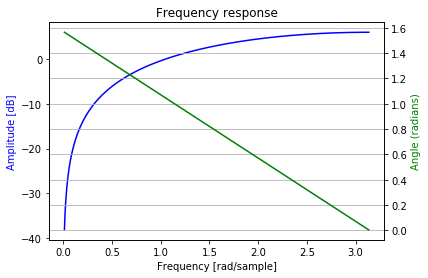

In [13]:
zt.mfreqz(fdf['num'],fdf['den'])

Conclusiones
- La respuesta en frecuencia presenta un solo lobulo
- Su comportamiento es pasa-altas
- Notemos que por encima de f=1.0 la amplitud es mas de 0dB, por lo que podría amplificar ruido de alta frecuencia
- Su respuesta en fase es lineal

### 5. Conclusiones Generales

##### Histograma
- El histograma permite ver que fenómenos (en particulares que valores de una variable) son más comunes en relación a otros.
- En nuestro caso del histogram se dedujo que a mayores precipitaciones menor frecuencia (de ocurrencia)

##### Filtro de media movíl
- Ayuda al suavizado de señales
- A medida que L aumenta la señal pierde amplitud y se desfasa más
- Por lo que no es conveniente sobre-suavizar la señal
- Su naturelza frecuencial es de pasabajas con fase lineal

##### Filtro de media movíl
- Permite conocer la tasa de cambio de una señal
- Podría amplificar el ruido (y en particular aquellos de alta frecuencia)
- Por lo que es conveniente realizar un pasabajas previamente
- Su naturelza frecuencial es de pasaaltas con fase lineal

##### Respuesta al impulso
- Permite ver si el sistema es causal y estable
- Conociendola podemos saber la respuesta del sistema ante cualquier señal

##### Diagramas de respuesta en frecuencia
- Podemos saber como se afecta la fase y la amplitud en funcion de la frecuencia
- En procesamiento digital el eje frecuencial está normalizado mediante la frecuencia de Nyquist
- Por lo que podemos inferir que las frecuencias (físicas-reales) que el filtro afecta dependen de la frecuencia de muestreo de la señal